In [1]:
# Import necessary libraries for text data preprocessing
import os
import re
import nltk
import spacy
import numpy as np
import pandas as pd
from tqdm import tqdm
from nltk.corpus import stopwords

In [13]:
nlp = spacy.load('en_core_web_sm')

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

extra_words = ['not','until','against','up', 'down', 'no', 'nor',"aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',
                                                "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 
                                                 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't", "don't"]

stop_words = [word for word in stopwords if word not in extra_words]

In [ ]:
print(stop_words)

**Loading the dataset**

In [11]:
df = pd.read_csv('/kaggle/input/sentiment140/training.1600000.processed.noemoticon.csv', encoding="latin", header=None, on_bad_lines='skip')

# renaming columns
df.rename(columns={0:'labels', 5:'tweets'}, inplace=True)

# Dropping unnecessary columns 
df.drop([1,2,3,4], axis=1, inplace=True)

df['labels'] = df['labels'].replace(4,1)

# Randomly shuffling the DataFrame and selecting a subset of 10,000 rows
df = df.sample(frac=1)
df = df.head(10000)

df.head()

,labels,tweets
606972,0,Two gloomy days in a row... I miss the sun
137110,0,@feelingfarah Awww Sorry to hear that.
302179,0,Wishing I was listening to Imprint Live but it...
1038511,1,@therealTiffany i could be tawni's personal co...
141251,0,is going home now... i just want to go home st...


In [14]:
def get_word_len(tweet):
    return len(tweet.split(' '))

def get_char_len(tweet):
    return len(tweet)

def preprocess_tweet(tweet):
    tweet = tweet.lower()
    # remove urls from the tweet
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove mentions (e.g., @username) from the tweet
    tweet = re.sub(r'@\w+', '', tweet)
    
    # Remove special characters and punctuation from the tweet
    tweet = re.sub(r'[^\w\s#]', '', tweet)
    
    # Lemmatize the words using spaCy
    tokens = [token.lemma_ for token in nlp(tweet)]
    
    # Remove stop words
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove single-character tokens
    tokens = [token for token in tokens if len(token) > 1]
    
    # Join the processed tokens to form the cleaned tweet
    processed_tweet = ' '.join(tokens)
    
    return processed_tweet

df['clean_tweets'] = [preprocess_tweet(tw) for tw in tqdm(df['tweets'], position=0, leave=True)]

df['tweets_words_length'] = df['clean_tweets'].apply(get_word_len)

df['tweets_char_length'] = df['clean_tweets'].apply(get_char_len)

df.head()

100%|██████████| 10000/10000 [01:27<00:00, 114.49it/s]


,labels,tweets,clean_tweets,tweets_words_length,tweets_char_length
606972,0,Two gloomy days in a row... I miss the sun,two gloomy day row miss sun,6,27
137110,0,@feelingfarah Awww Sorry to hear that.,awww sorry hear,3,15
302179,0,Wishing I was listening to Imprint Live but it...,wish listen imprint live good game night lose,8,45
1038511,1,@therealTiffany i could be tawni's personal co...,could tawni personal complimentor lol job would,7,47
141251,0,is going home now... i just want to go home st...,go home want go home straight,6,29


In [22]:
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [25]:
# number of positive sentiment tweets
positive_count = len(df[df['labels']==1])
negative_count = len(df[df['labels']==0])
# print(f"Negative sentiment tweets = {len(df[df['labels']==0])}")
# print(f"Positive sentiment tweets = {len(df[df['labels']==1])}")

fig = px.pie(values = [positive_count,negative_count], title = "Distribution of positive and negative tweets", 
        names = ['Positive', 'Negative'], hover_name = ['Positive', 'Negative'], opacity=.9, template='simple_white')

fig.show()

In [28]:
from wordcloud import WordCloud

Text(0.5, 1.0, 'Positive')

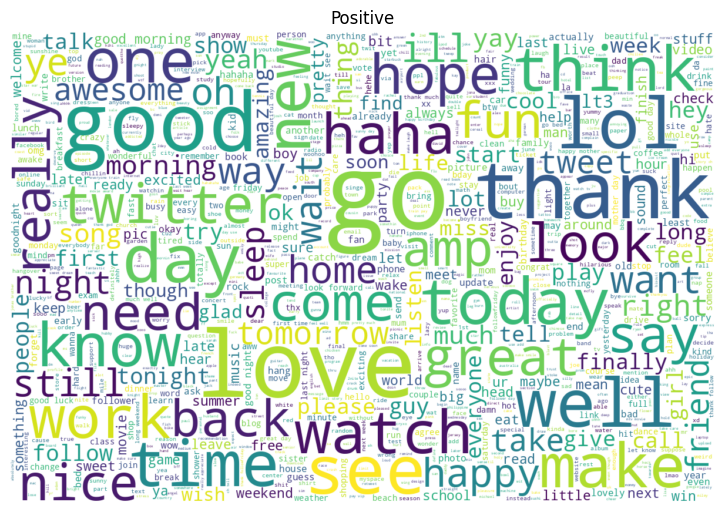

In [30]:
# for positive sentiment tweets

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==1]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Positive")

Text(0.5, 1.0, 'Negative')

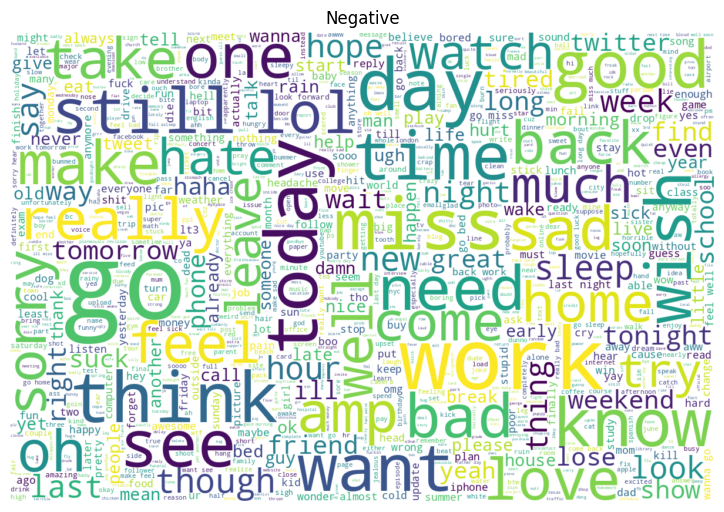

In [31]:
# for negative sentiment tweets 
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)

wordcloud_1 = WordCloud(width=1200, height=800, max_words=1000, contour_width=2, background_color='white', max_font_size=180, 
                        colormap='viridis').generate(' '.join(df[df['labels']==0]['clean_tweets'])) 

plt.imshow(wordcloud_1, interpolation = 'bilinear')
plt.axis('off')
plt.title("Negative")

In [33]:
# Create distribution plots for word count and character count for positive and negative tweets
fig_words = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_words_length'], df[df['labels'] == 0]['tweets_words_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

fig_chars = ff.create_distplot(
    [df[df['labels'] == 1]['tweets_char_length'], df[df['labels'] == 0]['tweets_char_length']],
    ['Positive', 'Negative'],
    bin_size=25,
    show_hist=False,
    show_rug=False
)

# Set titles and labels for the distribution plots
fig_chars.update_layout(title="Distribution Plot on Character Count", xaxis_title="Number of Characters", yaxis_title="Frequency")
fig_words.update_layout(title="Distribution Plot on Word Count", xaxis_title="Number of Words", yaxis_title="Frequency")

# Combine the plots in a 2-column layout
fig = make_subplots(rows=1, cols=2, subplot_titles=["Word Count", "Character Count"])
fig.add_trace(fig_words['data'][0], row=1, col=1)
fig.add_trace(fig_words['data'][1], row=1, col=1)
fig.add_trace(fig_chars['data'][0], row=1, col=2)
fig.add_trace(fig_chars['data'][1], row=1, col=2)

# Update overall layout and show the plot
fig.update_layout(title_text="Distribution Plots - Word Count vs Character Count", showlegend=True, font=dict(family="Arial", size=15, color="black"))
fig.show()